In [3]:
from haystack_integrations.components.embedders.ollama import OllamaDocumentEmbedder


/Users/michieldekoninck/.pyenv/versions/3.10.6/envs/haystack_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
document_embedder = OllamaDocumentEmbedder()


In [5]:
from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()

In [17]:
from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()

In [18]:
from haystack import Pipeline

from haystack.components.converters.txt import TextFileToDocument
from haystack.components.preprocessors.document_splitter import DocumentSplitter
from haystack.components.embedders import OpenAIDocumentEmbedder
from haystack.components.writers import DocumentWriter

converter = TextFileToDocument()
splitter = DocumentSplitter()
embedder = OllamaDocumentEmbedder()
writer = DocumentWriter(document_store=document_store)

indexing_pipeline = Pipeline()

indexing_pipeline.add_component("converter", converter)
indexing_pipeline.add_component("splitter", splitter)
indexing_pipeline.add_component("embedder", embedder)
indexing_pipeline.add_component("writer", writer)

In [19]:
indexing_pipeline.connect("converter", "splitter")
indexing_pipeline.connect("splitter", "embedder")
indexing_pipeline.connect("embedder", "writer")

🚅 Components
  - converter: TextFileToDocument
  - splitter: DocumentSplitter
  - embedder: OllamaDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> embedder.documents (List[Document])
  - embedder.documents -> writer.documents (List[Document])

In [20]:
indexing_pipeline.run({"converter": {"sources": ['data/2024_4_OKTA.txt']}})

Calculating embeddings: 100%|██████████| 59/59 [00:02<00:00, 22.95it/s]


{'embedder': {'meta': {'model': 'nomic-embed-text'}},
 'writer': {'documents_written': 59}}

In [23]:
from haystack_integrations.components.embedders.ollama import OllamaTextEmbedder
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

query_embedder = OllamaTextEmbedder()
retriever = InMemoryEmbeddingRetriever(document_store=document_store)

document_search = Pipeline()

document_search.add_component("query_embedder", query_embedder)
document_search.add_component("retriever", retriever)

document_search.connect("query_embedder.embedding", "retriever.query_embedding")

🚅 Components
  - query_embedder: OllamaTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
🛤️ Connections
  - query_embedder.embedding -> retriever.query_embedding (List[float])

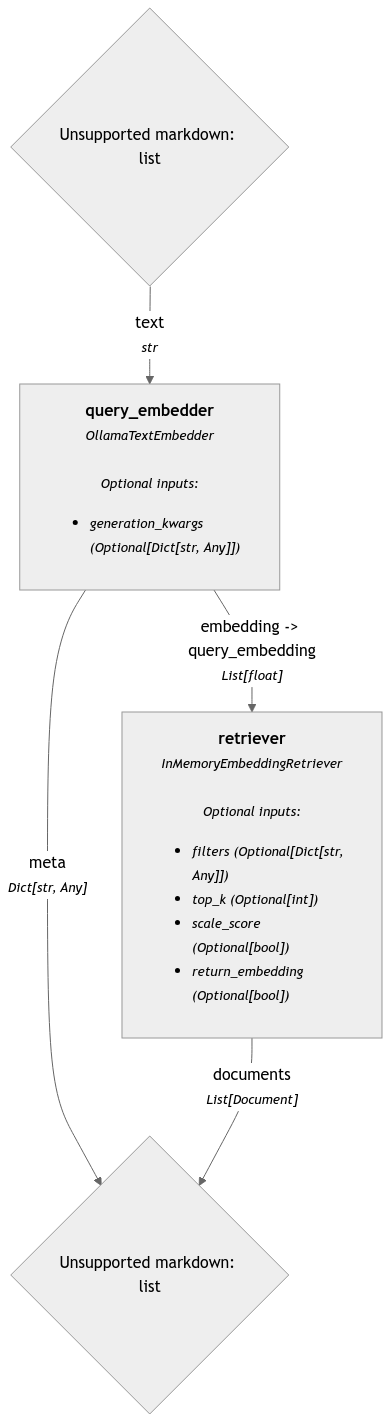

In [24]:
document_search.show()

In [25]:
question = "What were the main challenges?"

results = document_search.run({"query_embedder": {"text": question}})

for i, document in enumerate(results["retriever"]["documents"]):
    print("\n--------------\n")
    print(f"DOCUMENT {i}")
    print(document.content)


--------------

DOCUMENT 0
large deals? I know you mentioned just larger deals in general, but any that were kind of more larger than just that $1 million mark versus -- or was it just more of a broader base pick up in the pipeline? I mean, I guess I'm just trying to marry the size of the beat and seeing if there's anything that could be like a one-time factor versus going forward, a trend that's reversing?
Todd McKinnon: We had nothing, I mean the overall trend of million dollar deals was strong as we mentioned, growing 30%. There wasn't a one-off big deal that was really outsized compared to prior periods. So yeah, I would say it's more of a broad range or broad based strength in the large customers.
Brett Tighe: Yeah, I would just add in there, Madeline, just echoing what Todd said, we just had a really good quarter from large deals in general. But when I say large deals, it’s not just the million dollar deals, but a lot of deals from $100,000 up, right? Because if you think about 